### The fundamentals of autograd

* PyTorch의 Autograd 기능은 기계 학습 프로젝트 구축을 위해 PyTorch를 유연하고 빠르게 만드는 기능의 일부.
* 복잡한 계산에 대한 다중 편도함수(Gradient)를 빠르고 쉽게 계산할 수 있음.
* 이 작업은 역전파 기반 신경망 학습의 핵심.

* autograd의 강력한 점은 런타임에 계산을 동적으로 추적한다는 사실에서 비롯됨.
* 즉, 모델에 결정 분기가 있거나 런타임까지 길이를 알 수 없는 루프가 있는 경우에도 계산이 올바르게 추적되므로 올바른 결과를 얻을 수 있음.
* 학습을 촉진하는 그래디언트.
* 이는 모델이 Python으로 구축되었다는 사실과 결합되어 경사 계산을 위해 보다 엄격하게 구조화된 모델의 정적 분석에 의존하는 프레임워크보다 훨씬 더 많은 유연성을 제공함.

### Autograd가 필요한 이유는?
* 기계 학습 모델은 입력과 출력이 있는 함수.
* 입력을 i 차원 $ \overrightarrow x $ 벡터로 처리한다면, 요소는 $ x_i $.
* 그런 다음 모델 M 을 입력의 벡터 값 함수로 표현할 수 있음.
* $ \overrightarrow y = \overrightarrow M(\overrightarrow x) $. (일반적으로 모델에는 여러 개의 출력이 있을 수 있으므로 M의 출력 값을 벡터로 처리함.)

* 훈련의 맥락에서 autograd에 대해 주로 논의할 것이므로 관심 있는 출력은 모델의 손실이 됨.
* 손실 함수 $ L( \overrightarrow y ) = L( \overrightarrow M(\overrightarrow x) ) $ 은 모델 출력의 단일 값 스칼라 함수.
* 이 함수는 모델의 예측이 특정 입력의 이상적인 출력과 얼마나 멀리 떨어져 있는지를 나타냄.

* 모델을 훈련할 때 손실을 최소화하려고 함.
* 완벽한 모델의 이상적인 경우, 이는 모든 입력에 대해 손실이 0이 되도록 학습 가중치, 즉 조정 가능한 함수 매개변수를 조정하는 것을 의미함.
* 현실 세계에서는 다양한 입력에 대해 허용 가능한 손실을 얻을 때까지 학습 가중치를 조금씩 조정하는 반복적인 프로세스를 의미함.

* 가중치를 얼마나 멀리, 어느 방향으로 밀어야 할지 어떻게 결정?
* 우리는 손실을 최소화하려고 함.
* 이는 입력에 대한 1차 도함수를 0으로 만드는 것을 의미함.
* $ \frac{∂L}{∂x} = 0. $

* 하지만 손실은 입력에서 직접 파생되지 않고 모델 출력의 함수(입력의 직접 함수)라는 점을 기억.
* $ \frac{∂L}{∂x} = \frac{∂L}{∂x}\frac{∂M(x)}{∂x} $

* $ \frac{∂M(x)}{∂x} $ 은 상황이 복잡해지는 곳.
* 입력에 대한 모델 출력의 편도함수는 Chain rule을 사용하여 표현식을 다시 확장한다면 모델의 모든 곱해진 학습 가중치, 모든 활성화 함수 및 기타 모든 수학적 변환에 대해 많은 지역 편도함수를 포함하게 됨.
* 이러한 각 부분 도함수에 대한 전체 표현은 우리가 측정하려는 기울기의 변수로 끝나는 계산 그래프를 통해 가능한 모든 경로의 로컬 기울기 곱의 합임.

* 특히, 학습 가중치에 대한 기울기는 우리의 관심을 끌고 있음.
* 이는 손실 함수를 0에 더 가깝게 만들기 위해 각 가중치를 어떤 방향으로 변경해야 하는지 알려줌.

* 이러한 로컬 도함수 (각각 모델의 계산 그래프를 통해 별도의 경로에 해당)의 수는 신경망의 깊이에 따라 기하급수적으로 증가하는 경향이 있으므로 계산의 복잡성도 마찬가지임.
* 이것이 바로 autograd가 등장하는 곳.
* Autograd는 모든 계산의 기록을 추적함.
* PyTorch 모델의 모든 계산된 텐서는 입력 텐서의 기록과 이를 생성하는 데 사용된 함수를 전달함.
* 텐서에 대해 작동하도록 의도된 PyTorch 함수에는 각각 자체 도함수를 계산하기 위한 내장 구현이 있다는 사실과 결합되어 학습에 필요한 로컬 도함수의 계산 속도가 크게 빨라짐.

### 간단한 예
* 지금까지는 많은 이론에 대한 내용이었고, 실제로 autograd를 사용하면?
* 간단한 예부터 시작해보겠음.
* 먼저 결과를 그래프로 표시하기 위해 몇 가지 가져오기를 수행함.

In [ ]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

* 다음으로, $[0, 2π]$ 간격에 균등한 간격의 값으로 가득 찬 입력 텐서를 생성함.
* 그리고, requires_grad=True 로 지정. (텐서를 생성하는 대부분의 함수와 마찬가지로 torch.linspace() 선택적 requires_grad 옵션을 허용함.)
* 이 플래그를 설정하면 이후의 모든 계산에서 autograd가 해당 계산의 출력 텐서에 계산 기록을 축적하게 됨.

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


* 다음으로 계산을 수행하고 입력을 기준으로 출력을 플롯함.

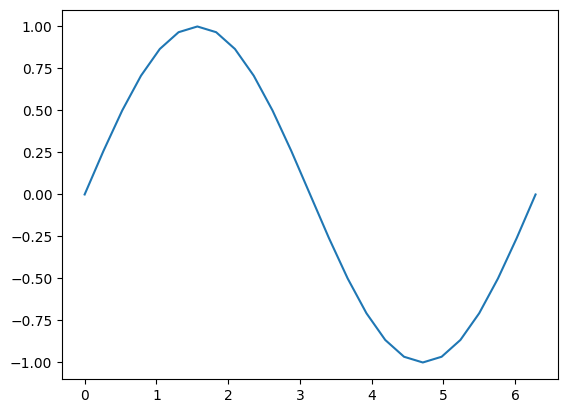

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

* b 텐서에 대해 자세히 살펴보겠음.
* 인쇄하면 계산 기록을 추적하고 있다는 표시가 표시됨.

In [ ]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


* 이는 grad_fn 역전파 단계를 실행하고 기울기를 계산할 때 다음의 도함수를 계산해야 한다는 힌트를 제공함.
* $sin(x)$ 모든 텐서의 입력에 대해, 계산을 수행해 보겠음.

In [ ]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


* 마지막으로 단일 요소 출력을 계산해 보겠음.
* 인수 없이 텐서를 호출하면 .backward() 손실 함수를 계산할 때와 마찬가지로 호출 텐서에는 단일 요소만 포함될 것으로 예상됨.

In [ ]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


* 텐서에 저장된 각 grad_fn을 사용하면 next_functions 속성을 사용하여 입력까지 계산을 계속 진행할 수 있음.
* d에서 이 속성을 드릴다운하면 모든 이전 텐서에 대한 그래디언트 함수가 표시되는 것을 아래에서 볼 수 있음.
* a.grad_fn은 None으로 보고되며, 이는 자체 기록이 없는 함수에 대한 입력임.

In [ ]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7c36ce100730>, 0), (None, 0))
((<SinBackward0 object at 0x7c36ce100460>, 0), (None, 0))
((<AccumulateGrad object at 0x7c37a6329000>, 0),)
()

c:

b:

a:
None


* 이 모든 기계를 갖춘 상태에서 파생 상품을 어떻게 얻을 수 있는지?
* 출력에서 backward() 메서드를 호출하고 입력의 grad 속성을 확인하여 그래디언트를 검사함.

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


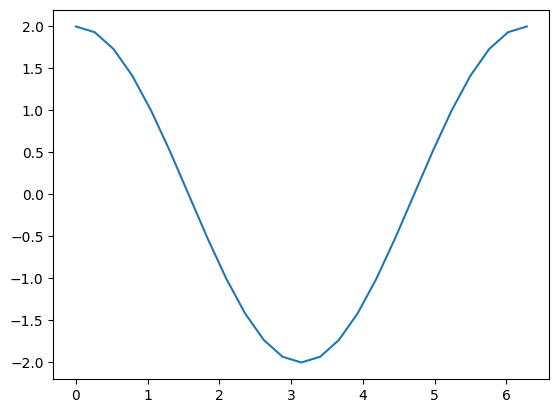

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

* 여기에 도달하기 위해 수행한 계산 단계를 기억.

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

* d를 계산할 때처럼 상수를 추가해도 도함수는 변경되지 않음.
* 그것은 $ c = 2 * b = 2 * sin(a) $ 이고, 파생물은 $ 2 * cos(a) $.
* 위의 그래프가 그 내용.

* 계산의 리프 노드만 그래디언트을 계산한다는 점에 유의.
* 예를 들어 print(c.grad)를 시도하면 None이 반환.
* 간단한 예에서는 입력만 리프 노드이므로 그래디언트만 계산됨.

### Autograd in Training
* 우리는 autograd가 어떻게 작동하는지 간략하게 살펴봄.
* 하지만 의도된 목적으로 사용될 때 어떻게 보이는지?
* 작은 모델을 정의하고 단일 학습 배치 후에 모델이 어떻게 변경되는지 살펴보겠음.
* 먼저 몇 가지 상수, 모델, 입력 및 출력에 대한 일부 대체 기능을 정의함.

In [ ]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

  def __init__(self):
    super(TinyModel, self).__init__()

    self.layer1 = torch.nn.Linear(1000, 100)
    self.relu = torch.nn.ReLU()
    self.layer2 = torch.nn.Linear(100, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

* 한 가지 주목할 만한 점은 requires_grad=True 모델의 레이어를 지정하지 않는다는 것.
* torch.nn.Module 의 하위 클래스 내에서는 학습을 위해 레이어 가중치에 대한 기울기를 추적한다고 가정.

* 모델의 레이어를 살펴보면 가중치 값을 검사하고 아직 기울기가 계산되지 않았는지 확인할 수 있음.

In [ ]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([ 0.0680,  0.0423, -0.0221, -0.0471, -0.0265,  0.0906, -0.0993,  0.0781,
         0.0101, -0.0400], grad_fn=<SliceBackward0>)
None


* 하나의 훈련 배치를 실행할 때 이것이 어떻게 변하는지 살펴봄.
* 손실 함수의 경우 우리는 prediction 와 ideal_output 사이의 유클리드 거리의 제곱을 사용하고 기본적인 확률적 경사 하강 최적화 프로그램을 사용함.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(161.6899, grad_fn=<SumBackward0>)


* 이제 loss.backward() 을 활용하여 무슨 일이 일어나는지 살펴봄.

In [ ]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0680,  0.0423, -0.0221, -0.0471, -0.0265,  0.0906, -0.0993,  0.0781,
         0.0101, -0.0400], grad_fn=<SliceBackward0>)
tensor([-0.0378, -1.3913, -3.2626, -6.7376, -7.6245,  2.0900, -6.4143,  0.6805,
        -3.3556, -5.7621])


* 각 학습 가중치에 대해 기울기가 계산되었지만 아직 최적화 프로그램을 실행하지 않았기 때문에 가중치는 변경되지 않은 상태로 유지되는 것을 볼 수 있음.
* 최적화 프로그램은 계산된 기울기를 기반으로 모델 가중치를 업데이트하는 일을 담당함.

In [ ]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0681,  0.0437, -0.0189, -0.0403, -0.0189,  0.0885, -0.0928,  0.0774,
         0.0135, -0.0343], grad_fn=<SliceBackward0>)
tensor([-0.0378, -1.3913, -3.2626, -6.7376, -7.6245,  2.0900, -6.4143,  0.6805,
        -3.3556, -5.7621])


* layer2의 가중치가 변경된 것을 볼 수 있음.

* 프로세스에 대한 한 가지 중요한 점은 optimizer.step()을 호출하고, optimizer.zero_grad()를 호출해야 하며, 그렇지 않으면 loss.backward()를 실행할 때마다 학습 가중치의 기울기가 누적된다는 것.

In [ ]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([-0.0378, -1.3913, -3.2626, -6.7376, -7.6245,  2.0900, -6.4143,  0.6805,
        -3.3556, -5.7621])
tensor([  1.6661,  -3.5271,  -5.3678, -12.8925, -22.1340,   2.8156, -16.9695,
          8.4873, -14.8495, -31.2418])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


* 위의 셀을 실행한 후에 loss.backward()는 여러 번 실행한 후에 대부분의 그래디언트 크기가 훨씬 더 커진다는 것을 알 수 있음.
* 다음 교육 배치를 실행하기 전에 기울기를 0으로 설정하지 않으면 기울기가 이런 방식으로 폭발하여 부정확하고 예측할 수 없는 학습 결과가 발생하게 됨.

### Autograd 끄기, 켜기

* autograd 활성화 여부를 세밀하게 제어해야 하는 상황이 있음.
* 가장 간단한 방법은 requires_grad 텐서의 플래그를 직접 변경하는 것.

In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


* 위의 셀에서 b1에는 grad_fn(즉, 추적된 계산 기록)이 있다는 것을 알 수 있음.
* 이는 autograd가 활성화된 텐서 a에서 파생되었기 때문에 우리가 예상한 것
* a.requires_grad = False로 명시적으로 autograd를 끄면 b2를 계산할 때 볼 수 있듯이 계산 기록이 더 이상 추적되지 않음.

* 일시적으로 autograd를 꺼야 한다면 더 좋은 방법은 torch.no_grad()를 사용하는 것.

In [ ]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
  c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


* torch.no_grad() 는 함수나 메소드 데코레이터로 사용될 수도 있음.

In [ ]:
def add_tensors1(x, y):
  return x + y

@torch.no_grad()
def add_tensors2(x, y):
  return x + y

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


* torch.enable_grad() 해당하는 컨텍스트 관리자가 있음.
* 아직 켜지지 않은 경우 autograd를 켬.
* 또한, 데코레이터로 사용 가능함.

* 마지막으로, 그래디언트 추적이 필요한 텐서가 있을 수 있지만 그렇지 않은 사본을 원함.
* 이를 위해 우리는 Tensor 객체의 detach() 메소드를 갖고 있음. (계산 기록에서 분리된 텐서의 복사본을 만듦.)

In [ ]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.9135, 0.6270, 0.9446, 0.6429, 0.2010], requires_grad=True)
tensor([0.9135, 0.6270, 0.9446, 0.6429, 0.2010])


* 위에서는 텐서의 일부를 그래프로 표시하려고 할 때 matplotlib 이 작업을 수행했음.
* 이는 NumPy 배열을 입력으로 예상하고, require_grad=True 인 텐서에 대해 PyToroch 텐서에서 NumPy 배열로의 암시적 변환이 활성화되지 않기 때문임.
* 분리된 복사본을 만들면 앞으로 나아갈 수 있음.

### Autograd and In-Place Operations
* 지금까지 이 노트북의 모든 예에서는 변수를 사용하여 계산의 중간 값을 캡처함.
* Autograd에서는 기울기 계산을 수행하기 위해 이러한 중간 값이 필요함.
* 이러한 이유로 autograd를 사용할 때는 내부 작업을 사용할 때 주의해야 함.
* 그렇게 하면 backward() 호출에서 파생 상품을 계산하는 데 필요한 정보가 손상될 수 있음.
* PyTorch는 아래와 같이 autograd가 필요한 리프 변수에 대해 내부 작업을 시도하는 경우에도 중지됨.

* 다음 코드 셀에서는 런타임 오류가 발생함.

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

### Autograd Profile

* Autograd는 계산의 모든 단계를 자세히 추적함.
* 타이밍 정보와 결합된 이러한 계산 기록은 편리한 프로파일러가 될 것이며 autoograd에는 해당 기능이 내장되어 있음.
* 다음은 간단한 사용법 예.

In [ ]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
  device = torch.device('cuda')
  run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.randn(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
  for _ in range(1000):
    z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                     cudaEventRecord        38.82%       5.807ms        38.82%       5.807ms       1.452us       0.000us         0.00%       0.000us       0.000us          4000  
                           aten::div        30.76%       4.602ms        30.76%       4.602ms       4.602us       9.811ms        50.89%       9.811ms       9.811us          1000  
                           aten::mul        29.43%       4.403ms        29.43%       4.403ms       4.403

* 프로파일러는 코드의 개별 하위 블록에 라벨을 지정하고, 입력 텐서 형태로 데이터를 분리하고, 데이터를 Chrome 추적 도구 파일로 내보낼 수도 있음.

### 고급 주제 : 더 많은 Autograd 세부 정보 및 고급 API

* n차원 입력과 m차원 출력을 갖는 함수가 있다면, $ \overrightarrow y = f(\overrightarrow x) $, 전에 그래디언트는 모든 입력에 대한 출력의 도함수 행렬로, 야코비안(Jacobian)이라고 함.
$$ J = \begin{pmatrix}
  \frac{∂y_1}{∂x_1} & \cdots & \frac{∂y_1}{∂x_n} \\
  \vdots & \ddots & \vdots  \\
  \frac{∂y_m}{∂x_1} & \cdots & \frac{∂y_m}{∂x_n}
 \end{pmatrix} $$
* 두 번째 기능이 있는 경우, $ l = g(\overrightarrow y) $ m차원의 입력(즉, 위의 출력과 동일한 차원을 사용함.), 그리고 스칼라 출력을 반환함.
* y에 대한 기울기를 열벡터로 표현할 수 있음.
* $ v = \begin{pmatrix}\frac{∂l}{∂y_1} & \cdots & \frac{∂l}{∂y_m} \end{pmatrix} $ : 이는 실제로 1열 야코비안 행렬임.
* 보다 구체적으로 첫 번째 함수를 PyTorch 모델(잠재적으로 많은 입력과 많은 출력 포함)로, 두 번째 함수를 손실 함수(모델의 출력을 입력으로, 손실 값을 스칼라 출력으로 사용)로 상상해봄.
* 첫 번째 함수의 야코비안 행렬에 두 번째 함수의 기울기를 곱하고 체인 규칙을 적용하면 다음과 같은 결과를 얻음.
$$ J^T \cdot v = \begin{pmatrix} \frac{∂y_1}{∂x_1} & \cdots & \frac{∂y_m}{∂x_1} \\
\vdots & \ddots & \vdots \\
\frac{∂y_1}{∂x_n} & \cdots & \frac{∂y_m}{∂x_n}
\end{pmatrix}
\begin{pmatrix} \frac{∂l}{∂y_1} \\
\vdots \\
\frac{∂l}{∂y_m}
\end{pmatrix} = \begin{pmatrix}
\frac{∂l}{∂x_1} \\
\vdots \\
\frac{∂l}{∂x_n}
\end{pmatrix} $$
* 결과 열 벡터 첫 번째 입력에 대한 두 번째 함수의 기울기임.
* 또는 모델 및 손실 함수의 경우 모델 입력에 대한 손실의 기울기임.
* **'torch.autograd'는 이러한 제품을 계산하는 엔진**.
* 이것이 역전파 과정에서 학습 가중치에 대한 기울기를 누적하는 방법임.
* 이러한 이유로 backward() 호출은 선택적 벡터 입력을 받을 수도 있음.
* 이 벡터는 텐서에 대한 일련의 경사도를 나타내며, 여기에 선행하는 자동 경사 추적 텐서의 야코비안을 곱함.
* 작은 벡터를 사용하여 구체적인 예를 시도함.

In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([ 380.8058, -528.5812,  989.9900], grad_fn=<MulBackward0>)


* 지금 y.backward() 를 호출하려고 하면, 우리는 런타임 오류가 발생하고 스칼라 출력에 대해서만 그래디언트를 암시적으로 계산할 수 있다는 메시지가 표시됨.
* 다차원 출력의 경우 autograd는 야코비안 행렬에 곱할 수 있는 세 가지 출력에 대한 기울기를 제공할 것으로 기대함.

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


### 고급 API
* Autograd에는 중요한 미분 행렬 및 벡터 연산에 직접 액세스할 수 있는 API가 있음.
* 특히, 특정 입력에 대한 특정 함수의 야코비안 행렬과 헤시안 행렬을 계산할 수 있음. (헤시안은 야코비안과 비슷하지만 모든 부분 2차 도함수를 표현함.)
* 또한 이러한 행렬로 벡터곱을 구하는 방법도 제공함.
* 2개의 단일 요소 입력에 대해 평가된 간단한 함수의 야코비안 행렬을 살펴봄.

In [ ]:
def exp_adder(x, y):
  return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.4153]), tensor([0.6853]))


(tensor([[3.0297]]), tensor([[3.]]))

* 자세히 보면 첫 번째 출력은 다음과 같아야 함. $ 2^{e^x} $ (since the derivative of $ e^x $ is $ e^x $)
* 두 번째 값은 3이어야 함.
* 물론 고차 텐서로도 이 작업을 수행할 수 있음.

In [ ]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.0079, 0.1535, 0.1851]), tensor([0.8015, 0.0124, 0.5976]))


(tensor([[2.0158, 0.0000, 0.0000],
         [0.0000, 2.3317, 0.0000],
         [0.0000, 0.0000, 2.4068]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

* 이 torch.autograd.functional.hessian() 방법은 동일하게 작동하지만(함수가 두 번 미분 가능하다고 가정) 모든 2차 도함수의 행렬을 반환함.
* 벡터를 제공하는 경우 벡터-야코비안 곱을 직접 계산하는 함수도 있음.


In [ ]:
def do_some_doubling(x):
  y = x * 2
  while y.data.norm() < 1000:
    y = y * 2
  return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([-1379.1674,   398.4069,   399.9741]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))

* torch.autograd.functional.jvp() 이 메서드는 피연산자를 거꾸로 한 vjp() 경우와 동일한 행렬 곱셈을 수행함.
* vhp() hvp() 및 방법은 벡터-헤시안 곱에 대해 동일한 작업을 수행함.